<a href="https://colab.research.google.com/github/harshvgangawane/PWSA4/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset?

In [223]:
df=sns.load_dataset('diamonds')

In [224]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [33]:
X=df.drop('price',axis=1)
y=df['price']

In [225]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [226]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [227]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()

In [228]:
categorical_features=['cut', 'color', 'clarity']

In [229]:
encoded=oh.fit_transform(df[categorical_features])

In [230]:
encoded.data

array([1., 1., 1., ..., 1., 1., 1.])

In [231]:
encoded_df=pd.DataFrame(encoded.toarray(),columns=oh.get_feature_names_out())

In [232]:
X=df.drop(categorical_features,axis=1)
X=pd.concat([X,encoded_df],axis=1)

In [233]:
X

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [234]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [235]:
lr.fit(X_train,y_train)

LinearRegression()

In [236]:
y_pred=lr.predict(X_test)

In [238]:
y_pred

array([[1.49904572],
       [0.81724361],
       [1.68483126],
       [1.34813162],
       [1.09453507],
       [1.49329182],
       [1.48059414],
       [0.74057676],
       [0.6196483 ],
       [1.46353795],
       [0.83820257],
       [1.11377298],
       [2.48330799],
       [2.04253676],
       [1.18686993],
       [2.48812013],
       [2.11631423],
       [2.70360829],
       [0.73445918],
       [2.03519632]])

In [239]:
y_test

array([[1.34858975],
       [1.02243223],
       [1.50479033],
       [1.2429315 ],
       [1.10823064],
       [1.34421244],
       [1.33465051],
       [1.01004505],
       [1.0004871 ],
       [1.32201837],
       [1.02667325],
       [1.1165659 ],
       [2.50438183],
       [1.88673673],
       [1.15105599],
       [2.51202061],
       [1.97881053],
       [2.87391468],
       [1.00926816],
       [1.87782461]])

In [240]:
error=y_test-y_pred

In [241]:
error

array([[-0.15045597],
       [ 0.20518861],
       [-0.18004093],
       [-0.10520011],
       [ 0.01369556],
       [-0.14907937],
       [-0.14594364],
       [ 0.26946829],
       [ 0.3808388 ],
       [-0.14151958],
       [ 0.18847067],
       [ 0.00279292],
       [ 0.02107384],
       [-0.15580003],
       [-0.03581394],
       [ 0.02390048],
       [-0.1375037 ],
       [ 0.17030638],
       [ 0.27480898],
       [-0.15737171]])

<ipython-input-243-f0a340ca3b5f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error,kde=True)


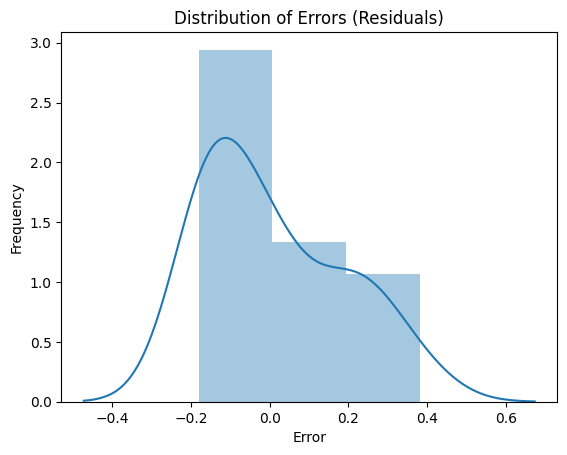

In [243]:
sns.distplot(error,kde=True)
plt.title('Distribution of Errors (Residuals)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


 Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error

In [52]:
mean_squared_error(y_test,y_pred)

1288705.4778516742

In [53]:
mean_absolute_error(y_test,y_pred)

737.151366593327

In [56]:
root_mean_squared_error(y_test,y_pred)

1135.2116445190625

 Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

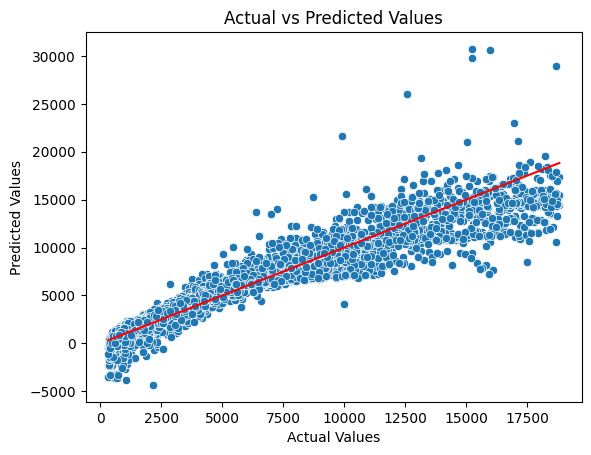

In [59]:
sns.scatterplot(x=y_test,y=y_pred)
sns.lineplot(x=y_test,y=y_test,color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

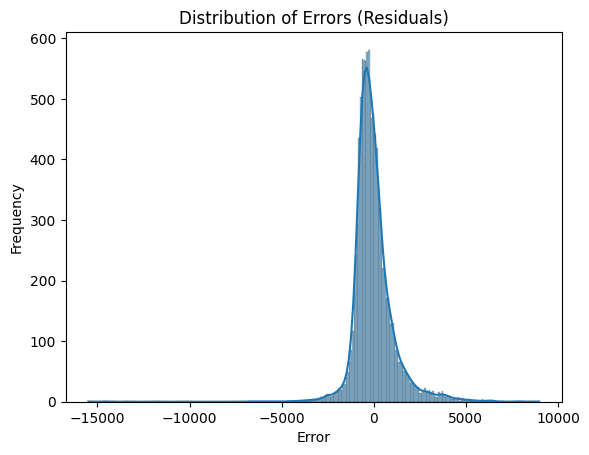

In [60]:
sns.histplot(error,kde=True)
plt.title('Distribution of Errors (Residuals)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


In [63]:
corr=df.corr(numeric_only=True)

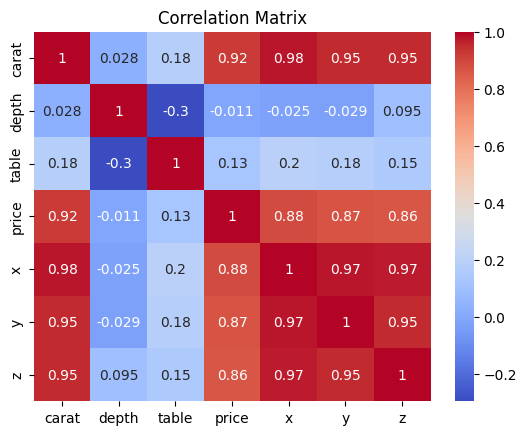

In [64]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error

In [60]:
num_features=['carat', 'depth', 'table', 'x', 'y', 'z']

In [61]:
preprocessor=ColumnTransformer(transformers=[('num',StandardScaler(),num_features),('cat',OneHotEncoder(),categorical_features)])

In [62]:
pipelines={ 'lr':Pipeline([('preprocessor',preprocessor),('regressor',LinearRegression())]),
            'ridge':Pipeline([('preprocessor',preprocessor),('regressor',Ridge())]),
            'lasso':Pipeline([('preprocessor',preprocessor),('regressor',Lasso())])
              }

In [63]:
for name,pipeline in pipelines.items():
   pipeline.fit(X_train, y_train)
   y_pred = pipeline.predict(X_test)
   mse = mean_squared_error(y_test, y_pred)
   mae = mean_absolute_error(y_test, y_pred)
   rmse = root_mean_squared_error(y_test, y_pred)
   print(f"{name}: MSE={mse:.2f}, MAE={mae:.2f}, RMSE={rmse:.2f}")


lr: MSE=1288705.48, MAE=737.15, RMSE=1135.21
ridge: MSE=1288677.68, MAE=737.14, RMSE=1135.20
lasso: MSE=1288059.05, MAE=735.33, RMSE=1134.93


Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.




In [66]:
df1=pd.read_csv('/content/sample_data/height-weight.csv')

In [67]:
X=df1['Height']
y=df1['Weight']

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [70]:
X_train=sc.fit_transform(X_train.values.reshape(-1,1))
X_test=sc.transform(X_test.values.reshape(-1,1))

In [71]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [72]:
lr.fit(X_train,y_train)

LinearRegression()

In [73]:
lr.coef_

array([14.89518969])

In [74]:
lr.intercept_

75.94117647058823

In [75]:
from sklearn.metrics import r2_score
r_square=r2_score(y_test,lr.predict(X_test))

In [76]:
r_square

0.8491371283907587

Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results

In [77]:
df2=sns.load_dataset('tips')

In [78]:
X=df2[['total_bill']]
y=df2[['tip']]

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [81]:
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred=lr.predict(X_test)

<Axes: xlabel='tip'>

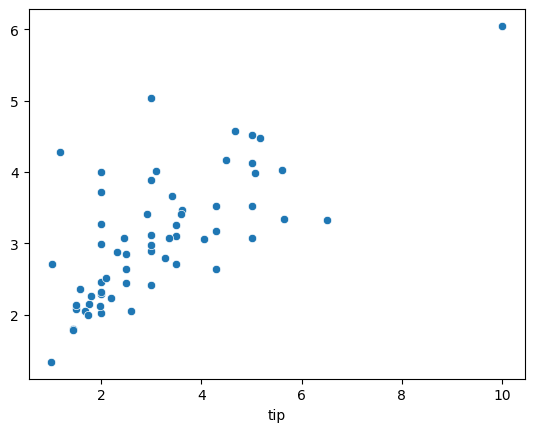

In [83]:
sns.scatterplot(x=y_test['tip'], y=y_pred.ravel())

Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line

In [84]:
X=np.linspace(0,1,100)
y=2*X

In [85]:
X

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [86]:
y

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [89]:
model=LinearRegression()

In [90]:
model.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [91]:
y_pred=model.predict(X_test.reshape(-1,1))

<Axes: >

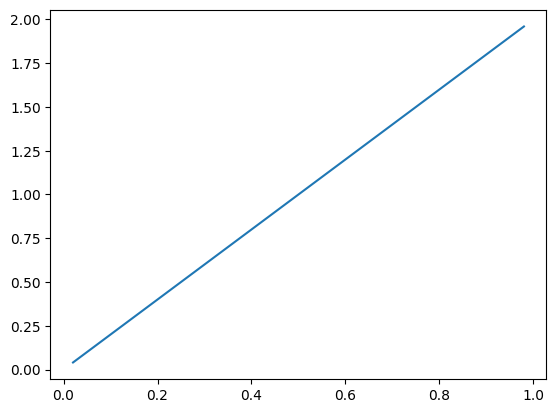

In [92]:
sns.lineplot(x=X_test,y=y_pred)


 Write a Python script that pickles a trained linear regression model and saves it to a file?



In [93]:
import pickle

In [94]:
pickle.dump(model, open("model.pkl", "wb"))

In [95]:
model = pickle.load(open("model.pkl", "rb"))

In [96]:
model.predict(X_test.reshape(-1,1))

array([1.61616162, 1.6969697 , 0.66666667, 1.63636364, 1.87878788,
       0.34343434, 0.72727273, 1.65656566, 1.39393939, 1.31313131,
       1.85858586, 0.78787879, 1.13131313, 1.05050505, 1.03030303,
       0.64646465, 0.62626263, 0.88888889, 1.57575758, 0.2020202 ,
       0.04040404, 1.47474747, 1.95959596, 1.25252525, 0.38383838])

Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve

In [97]:
X=np.random.rand(100,1)
y=2*X**2+1

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [100]:
poly_train=poly.fit_transform(X_train)
poly_test=poly.transform(X_test)

In [101]:
ml=LinearRegression()

In [102]:
ml.fit(poly_train,y_train)

LinearRegression()

In [103]:
y_poly_predict=ml.predict(poly_test)

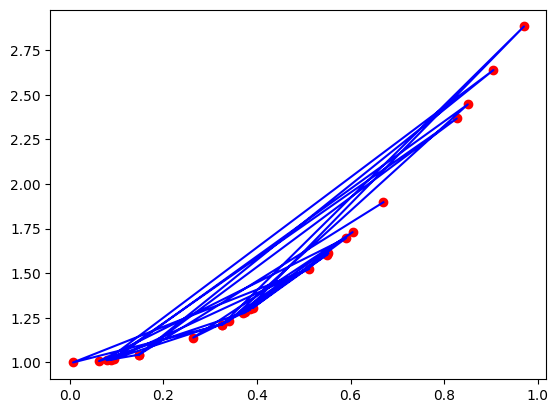

In [104]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_poly_predict,color='blue')

 Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.




In [105]:
X=np.random.randn(100)

In [106]:
X

array([-0.8606812 , -1.48802076, -1.44173142,  0.83486491, -1.56712157,
       -0.52722815, -0.46771343, -0.88933579,  0.85921337, -1.3849754 ,
        0.32783251, -0.99242862,  0.68029057,  0.05618887, -2.05362289,
       -0.26468922, -0.11947749, -0.66404352,  0.61711216, -0.9037998 ,
        0.70239454, -0.70203692,  0.59260943, -0.52867205, -1.01939235,
       -2.09396432, -0.17424518, -2.41671527,  0.32801118, -0.85462131,
       -0.51967615,  0.30675956, -1.36118351, -1.30926508,  1.86590232,
       -0.94414009,  0.50246091, -0.33202604,  1.06439991,  1.75985779,
       -1.9839345 ,  1.3952158 , -1.1997117 , -0.81391703,  0.53341157,
        1.18285399, -0.22851628, -1.12362662, -0.497901  ,  0.32801736,
       -2.13361332,  1.88948284,  1.17697231, -0.34571113, -0.87290301,
       -0.26632609,  0.64560702,  0.84612372,  0.74373122, -0.18364824,
        1.1768601 , -1.13716982,  2.32528475,  0.79178795, -0.98662114,
        0.34848051,  0.90858461, -0.70547936, -0.10620731,  0.56

In [107]:
y=X+np.random.randn(100)

In [108]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [109]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [110]:
lm.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [111]:
lm.coef_

array([1.33950116])

In [112]:
lm.intercept_

0.10670870920088354

 Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

In [113]:
  X=np.random.rand(100,1)
  y=2*X**2+1

In [114]:
degree=[1,3,5]

In [115]:
from sklearn.preprocessing import PolynomialFeatures

Degree: 1
MSE: 0.0253318972897064


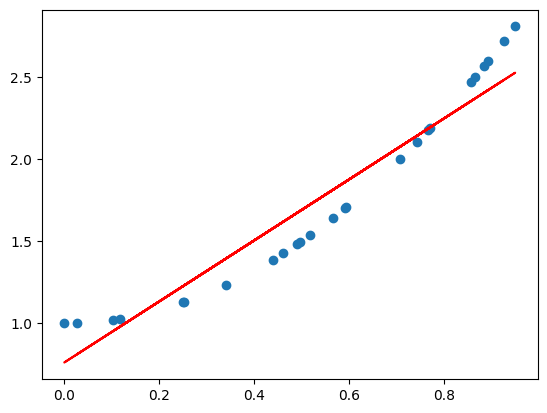

Degree: 3
MSE: 2.761013168273541e-31


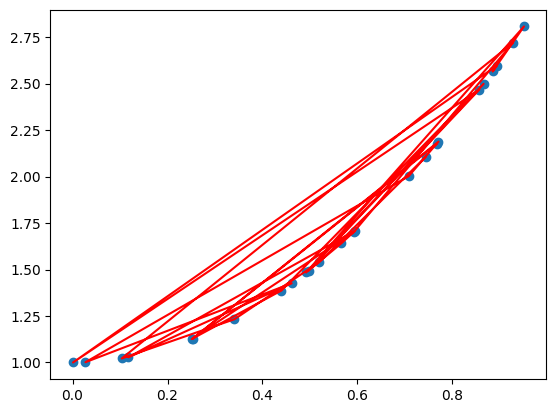

Degree: 5
MSE: 9.68326761158792e-31


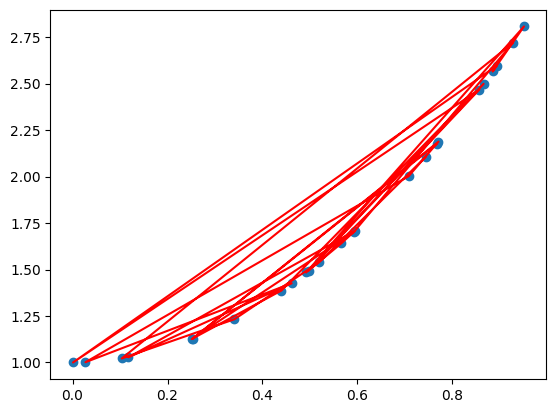

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
degree=[1,3,5]
for degree in degree:
    poly_f=PolynomialFeatures(degree=degree)
    X_poly=poly_f.fit_transform(X_train) # Fit and transform only on training data
    X_test_poly = poly_f.transform(X_test) # Transform test data using the same polynomial features
    model=LinearRegression()
    model.fit(X_poly,y_train) # Fit the model on training data
    y_pred=model.predict(X_test_poly) # Predict on transformed test data
    mse=mean_squared_error(y_test,y_pred)
    print("Degree:",degree)
    print("MSE:",mse)
    plt.scatter(X_test,y_test) #Plot test data
    plt.plot(X_test,y_pred,color='red') # Plot prediction on test data
    plt.show()

 Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [123]:
x1=np.random.rand(100,1)
x2=np.random.rand(100,1)
X=np.concatenate((x1,x2),axis=1)
y=2*x1+3*x2

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [125]:
model.fit(X_train,y_train)

LinearRegression()

In [126]:
y_pred=model.predict(X_test)

In [127]:
model.coef_

array([[2., 3.]])

In [128]:
model.intercept_

array([-4.4408921e-16])

In [129]:
from sklearn.metrics import r2_score
r_square=r2_score(y_test,y_pred)

In [130]:
r_square

1.0

 Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points

In [133]:
X = np.random.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 2 * X + 1 + np.random.randn(100, 1)  # Linear relationship with some noise

In [135]:
model = LinearRegression()

In [136]:
model.fit(X, y)


X_fit = np.linspace(0, 10, 100).reshape(-1, 1)
y_fit = model.predict(X_fit)



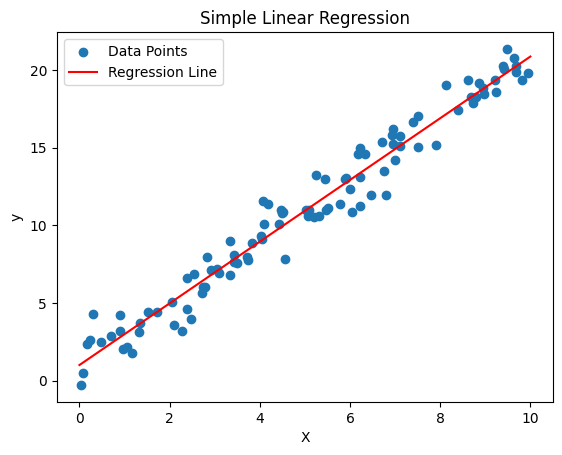

In [137]:
plt.scatter(X, y, label="Data Points")
plt.plot(X_fit, y_fit, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [138]:
from sklearn.datasets import fetch_california_housing

In [139]:
data=fetch_california_housing()

In [140]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [141]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [142]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [143]:
california=pd.DataFrame(data.data,columns=data.feature_names)

In [144]:
california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [145]:
california['Price']=data.target

In [147]:
california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
vif = pd.DataFrame()
vif["Feature"] = california.columns

In [150]:
vif['VIF'] =[ variance_inflation_factor(california.values, i) for i in range(len(california.columns))]

In [151]:
vif

,Feature,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [152]:
california.drop('Longitude',axis=1,inplace=True)

In [153]:
california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,0.847


In [154]:
vif = pd.DataFrame()
vif["Feature"] = california.columns
vif['VIF'] =[ variance_inflation_factor(california.values, i) for i in range(len(california.columns))]


In [155]:
vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [156]:
california.drop('AveRooms',axis=1,inplace=True)

In [157]:
vif = pd.DataFrame()
vif["Feature"] = california.columns
vif['VIF'] =[ variance_inflation_factor(california.values, i) for i in range(len(california.columns))]


In [158]:
vif

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.




In [159]:
X=np.random.randn(68)

In [164]:
y=1+2*X+4*X**2

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

In [166]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=4)

In [54]:
poly_train=poly_features.fit_transform(X_train.reshape(-1,1))

In [167]:
from sklearn.linear_model import LinearRegression
XML=LinearRegression()

In [171]:
poly_features = PolynomialFeatures(degree=4)

# Fit and transform on the TRAINING data
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))

# Fit the model using the transformed training data and corresponding target
XML = LinearRegression()
XML.fit(X_train_poly, y_train)


LinearRegression()

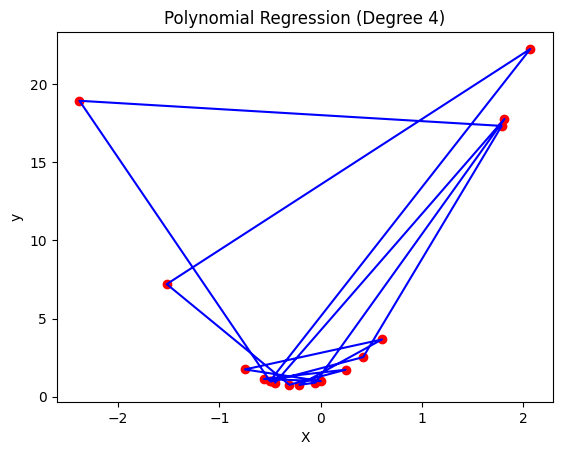

In [58]:
poly_test = poly_features.transform(X_test.reshape(-1, 1))
y_pred = XML.predict(poly_test)  # Predict on transformed X_test

plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

 Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # Import r2_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', LinearRegression())  # Multiple linear regression model
])


pipeline.fit(X_train.reshape(-1,1), y_train)
y_pred = pipeline.predict(X_test.reshape(-1,1))


r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.1282558900229671


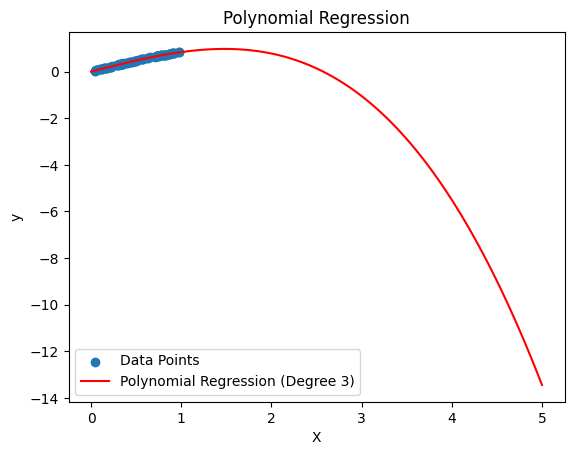

In [172]:

X =np.random.rand(80, 1)
y = np.sin(X)

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)


poly_model = LinearRegression()
poly_model.fit(X_poly, y)
X_fit = np.linspace(0, 5, 100).reshape(-1, 1)
X_fit_poly = poly_features.transform(X_fit)
y_fit = poly_model.predict(X_fit_poly)

# Plot the data points and the regression curve
plt.scatter(X, y, label='Data Points')
plt.plot(X_fit, y_fit, color='red', label='Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

 Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients

In [ ]:

X = np.random.rand(100, 5)
y = 2*X[:, 0] + 3*X[:, 1] - X[:, 2] + 0.5*X[:, 3] + np.random.randn(100)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [197]:
y_pred = model.predict(X_test)

In [198]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Print model coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

R-squared: 0.8835421266550815
Coefficients: [ 1.9547338   3.16352824 -1.03414025]
Intercept: 0.4164550980095827


 Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line

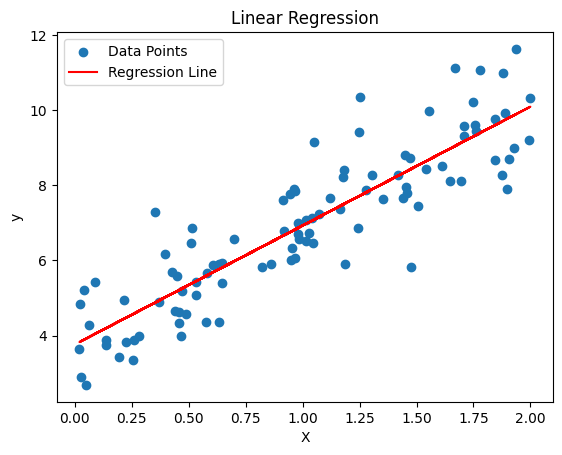

In [173]:
from sklearn.linear_model import LinearRegression
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [189]:

np.random.seed(0)
X = np.random.rand(100, 3)
y = 2*X[:, 0] + 3*X[:, 1] - 1*X[:, 2] +np.random.rand(100)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [191]:
y_pred = model.predict(X_test)



In [192]:
y_pred

array([1.52292762, 2.28896704, 2.35274799, 2.71284694, 1.03547174,
       3.62590875, 1.46190838, 1.94183563, 2.91117762, 3.12841929,
       0.65965516, 3.01424671, 3.12829226, 2.29069915, 4.7503432 ,
       4.38152086, 4.31778412, 2.44622697, 2.58865954, 2.54278288])

In [193]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

R-squared: 0.8835421266550815
Coefficients: [ 1.9547338   3.16352824 -1.03414025]
Intercept: 0.4164550980095827


 Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [174]:
# prompt: Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

import joblib

# ... (Your existing code) ...

# Save the model using joblib
joblib.dump(model, "model.joblib")

# Load the model from the file
loaded_model = joblib.load("model.joblib")

# Use the loaded model to make predictions
loaded_model.predict(X_test.reshape(-1,1))

array([[ 4.67179932],
       [ 5.90597619],
       [ 4.12764672],
       [ 6.60010521],
       [ 5.23972998],
       [ 2.79666584],
       [ 5.19639799],
       [ 2.56163923],
       [ 1.70563267],
       [ 4.47201216],
       [ 3.75845169],
       [ 4.95684519],
       [-3.5891764 ],
       [-0.69147706],
       [ 2.58838978],
       [ 0.7669767 ],
       [ 5.41041208]])

 Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [175]:
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [176]:
cat_features=['sex','smoker','day','time']

In [177]:
cat_features

['sex', 'smoker', 'day', 'time']

In [178]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [179]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False) # Set sparse_output=False

encoded_features = encoder.fit_transform(df2[cat_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_features))

# Concatenate the encoded features with the numerical features
X = pd.concat([df2.drop(cat_features, axis=1), encoded_df], axis=1)
y = df2['tip']

 Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [180]:
# prompt:  Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 2*X[:, 0] + 3*X[:, 1] - X[:, 2] + np.random.randn(100) # Linear relationship with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_y_pred)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Print results
print("Linear Regression:")
print("Coefficients:", lr_model.coef_)
print("R-squared:", lr_r2)

print("\nRidge Regression:")
print("Coefficients:", ridge_model.coef_)
print("R-squared:", ridge_r2)

Linear Regression:
Coefficients: [ 2.11216988  2.86635908 -0.59889517  0.30214549 -0.25697614]
R-squared: 0.39809170376152847

Ridge Regression:
Coefficients: [ 1.74280504  2.400775   -0.42102978  0.26887214 -0.21315952]
R-squared: 0.4409588673787641


Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [182]:
from sklearn.model_selection import cross_val_score
X = np.random.rand(100, 5)
y = 2*X[:, 0] + 3*X[:, 1] - X[:, 2] + np.random.randn(100)


In [183]:
model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the R-squared scores for each fold
print("R-squared scores for each fold:", scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared:", scores.mean())
print("Standard deviation of R-squared:", scores.std())

R-squared scores for each fold: [-0.18093095  0.4116597   0.4024316   0.46266782  0.63437588]
Mean R-squared: 0.34604080930132786
Standard deviation of R-squared: 0.27637799230296384



 Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [199]:

X = np.random.rand(100, 1)
y = 2*X**2+1

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
degrees = [1, 2, 3, 4, 5]  # Degrees of polynomials to test

In [207]:
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_poly_test)

    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)
    print("Degree:",degree)
    print("R2_score:",r2)

Degree: 1
R2_score: 0.9035161705746004
Degree: 2
R2_score: 1.0
Degree: 3
R2_score: 1.0
Degree: 4
R2_score: 1.0
Degree: 5
R2_score: 1.0
